<a href="https://colab.research.google.com/github/divyat-thv/Codveda3/blob/main/house_prediction_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Confusion Matrix:
 [[ 6  0  4]
 [ 0 33 10]
 [ 2  2 45]]

Classification Report:
               precision    recall  f1-score   support

        High       0.75      0.60      0.67        10
         Low       0.94      0.77      0.85        43
      Medium       0.76      0.92      0.83        49

    accuracy                           0.82       102
   macro avg       0.82      0.76      0.78       102
weighted avg       0.84      0.82      0.82       102



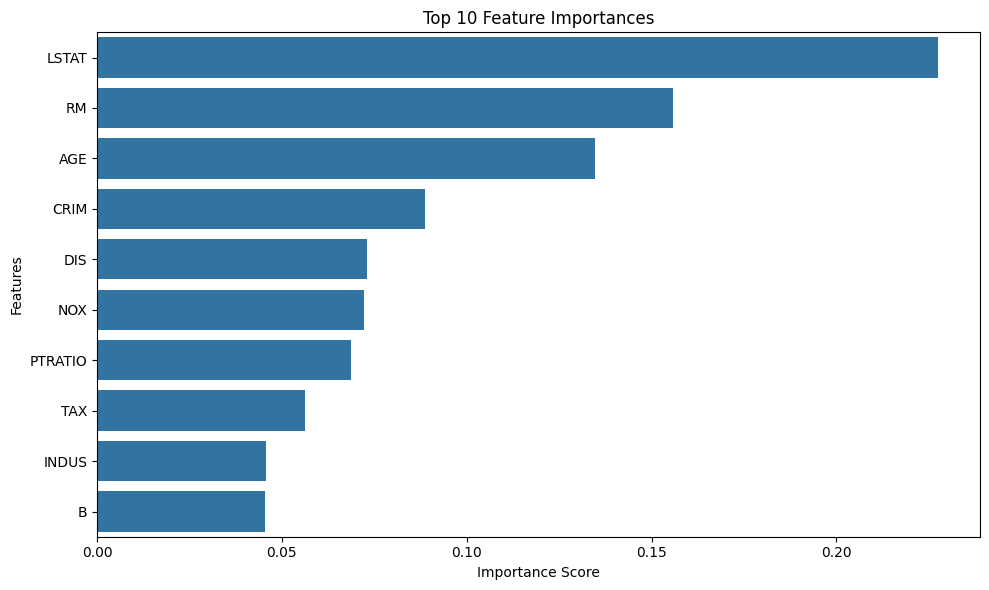

['models/scaler.pkl']

In [ ]:
# Boston House Price Category Classification (Level 3 Task)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Define column names (as dataset has no header)
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
                'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# 2. Load dataset (space-separated)
df = pd.read_csv("4) house Prediction Data Set.csv", sep='\s+', names=column_names)

# 3. Create a categorical target: PriceCategory
df['PriceCategory'] = pd.cut(df['MEDV'],
                             bins=[0, 20, 35, df['MEDV'].max()],
                             labels=['Low', 'Medium', 'High'])

# 4. Drop missing values (if any)
df.dropna(inplace=True)

# 5. Split into features and target
X = df.drop(['MEDV', 'PriceCategory'], axis=1)
y = df['PriceCategory']

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 7. Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Train Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# 9. Make predictions and evaluate
y_pred = clf.predict(X_test_scaled)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 10. Plot feature importance
importances = clf.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Ensure output folder exists
os.makedirs('outputs', exist_ok=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('outputs/feature_importance.png')
plt.show()

# 11. Save model and scaler
os.makedirs('models', exist_ok=True)
joblib.dump(clf, 'models/rf_model.pkl')
joblib.dump(scaler, 'models/scaler.pkl')
